In [1]:
import matplotlib.pyplot as plt
import numpy as np

from phase_portrait import phase_portrait
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def phase_portrait(xmin, xmax, ymin, ymax, dt, func, N):
    fig, ax = plt.subplots(1, 1)
    color = iter(plt.cm.rainbow(np.linspace(0, 1, N**2)))
    x, y = np.meshgrid(np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N))
    for i, j in np.ndindex(N, N):
        x0 = x[i, j] + (xmin - xmax)/(100*N)
        y0 = y[i, j] + (ymin - ymax)/(100*N)
        c = next(color)
        Y = [[x0, y0]]
        Y = rk4(np.array([x0, y0]), func, dt, [xmin, ymin], [xmax, ymax], Y)
        ax.plot(x0, y0, "o", color=c)
        ax.plot(Y[:, 0], Y[:, 1], color=c)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    return ax

In [3]:
def phase_portrait_3D(xmin, xmax, ymin, ymax, zmin, zmax, dt, func, N):
    fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})
    color = iter(plt.cm.rainbow(np.linspace(0, 1, N**3)))
    x, y, z = np.meshgrid(np.linspace(xmin, xmax, N),
                          np.linspace(ymin, ymax, N),
                          np.linspace(zmin, zmax, N))
    for i, j, k in np.ndindex(N, N, N):
        x0 = x[i, j, k] + (xmin - xmax)/(100*N)
        y0 = y[i, j, k] + (ymin - ymax)/(100*N)
        z0 = z[i, j, k] + (zmin - zmax)/(100*N)
        c = next(color)
        Y = [[x0, y0, z0]]
        Y = rk4(np.array([x0, y0, z0]), func, dt,
                [xmin, ymin, zmin],
                [xmax, ymax, zmax], Y)
        ax.plot([x0], [y0], [z0], "o", color=c)
        ax.plot(Y[:, 0], Y[:, 1], Y[:, 2], color=c)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_zlabel(r"$z$")
    return ax

In [20]:
def rk4(y0, f, dt, ymin, ymax, y, max_iter=100, n_iter=0):
    y0 = np.array(y0)
    k1 = f(y0)
    k2 = f(y0 + dt*k1/2)
    k3 = f(y0 + dt*k2/2)
    k4 = f(y0 + dt*k3)

    y1 = y0 + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    y.append(list(y1))

    if (y1 < ymax).all() and (y1 > ymin).all() and n_iter < max_iter:
        try:
            rk4(y1, f, dt, ymin, ymax, y, max_iter, n_iter + 1)
        except RecursionError:
            pass

    return(np.array(y))

In [26]:
def ξ(x, κ):
    return κ*(2/(1 + np.exp(-x)) - 1)

In [28]:
κ = 5
γ = 4

In [29]:
def func(X):
    return np.array([(κ**2)*ξ(X[1], κ) - 2*γ*X[0] - (γ**2)*X[1], X[0]])

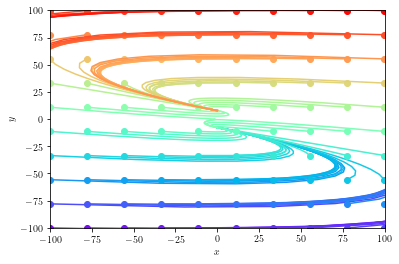

In [31]:
phase_portrait(-100, 100, -100, 100, 0.05, func, 10)